# Regresión lineal simple (una variable dependiente y una variable explicativa)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Lectura de base de datos y ajuste del tipo de valor por columna

In [2]:
#Lectura de base de datos
M = pd.read_csv("C:\\Users\\ricardo\\Desktop\\BanxicoTrabajoCasa_v3\\CursoCienciaDeDatos\\Clases\\Programas_Modulo3\\RegresionLinealSimple2-5.csv",dtype='str',encoding = "ISO-8859-1")

In [3]:
#Ajuste de formato de columnas
M["X"] = M["X"].astype(float)
M["Y"] = M["Y"].astype(float)
M.head()

,X,Y
0,2.0,-9.910487
1,4.0,-7.197661
2,6.0,22.737312
3,8.0,50.373510
4,10.0,8.505899


In [4]:
x = M["X"].values.tolist()
y = M["Y"].values.tolist()

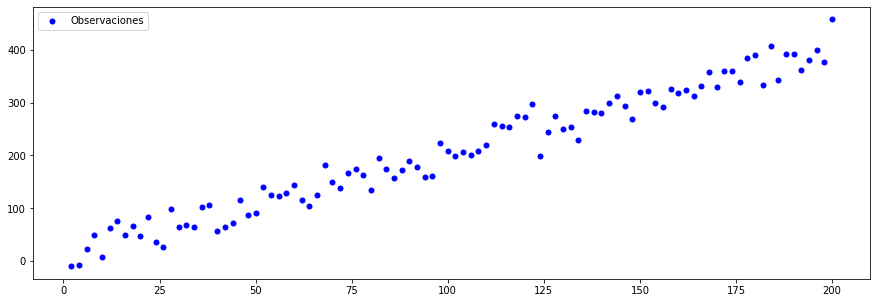

In [5]:
#Gráfica de observaciones
fig = plt.figure(figsize=(15.,5.))
ax = fig.add_subplot(1,1,1)
plt.scatter(x,y,color="blue",s=25,label="Observaciones")
plt.legend(loc='best')
plt.show()

In [6]:
#Función auxiliar
xejemp = [1,3,7]
yejemp = [2,-1,3]
r = np.dot(xejemp,yejemp)
print(r)
print( (1)*(2) + (3)*(-1) + (7)*(3) )

20
20


# Función para el cálculo de los coeficientes de la regresión lineal

In [7]:
#Función para el cálculo de los coeficientes de la regresión lineal
def RLS(x,y):
    n = len(y)
    m = (-np.dot(x,y) + float(n)*np.mean(y)*np.mean(x))/(-np.dot(x,x) + n*(np.mean(x)**2.))
    b = np.mean(y) - m*np.mean(x)
    #Definición del vector de valores estimados y de residuales
    ye = []
    e = []
    for i in range(n):
        ye.extend([m*x[i] + b])
        e.extend([y[i]-ye[i]])
    return [m,b,ye,e]
[m,b,ye,e] = RLS(x,y)

In [8]:
#Impresión de pendiente y ordenada al origen
print("La pendiente estimada es",m)
print("La ordenda al origen estimada es",b)

La pendiente estimada es 1.9620420568904182
La ordenda al origen estimada es 9.483643256247746


In [9]:
#Creación de base con la aproximación y residuales
MRL = M.copy(deep=True).reset_index(drop=True)
MRL["Y_Est"] = ye
MRL["Residuales"] = e
MRL.head()

,X,Y,Y_Est,Residuales
0,2.0,-9.910487,13.407727,-23.318215
1,4.0,-7.197661,17.331811,-24.529472
2,6.0,22.737312,21.255896,1.481416
3,8.0,50.373510,25.179980,25.193531
4,10.0,8.505899,29.104064,-20.598165


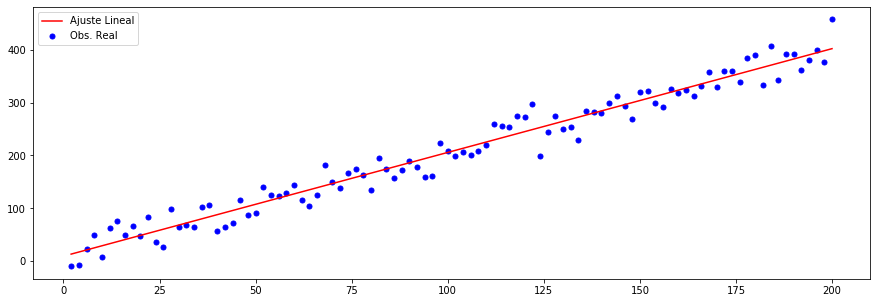

In [10]:
#Gráfica (Regresión Lineal)
fig = plt.figure(figsize=(15.,5.))
ax = fig.add_subplot(1,1,1)
plt.scatter(x,y,color="blue",s=25,label="Obs. Real")
plt.plot(x,ye,color="red",linewidth=1.5,label="Ajuste Lineal")
plt.legend(loc='best')
plt.show()

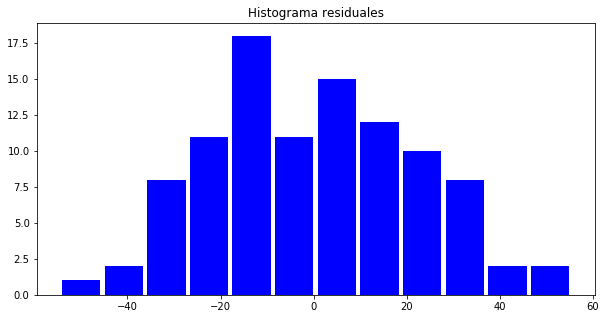

In [11]:
#Histograma sin suavizamiento de Kernel
from math import log
fig = plt.figure(figsize=(10.,5.))
ax = fig.add_subplot(1,1,1)
ax.set_title("Histograma residuales")
plt.hist(e, bins = 12,histtype="bar",rwidth=0.9,color="blue")
plt.show()

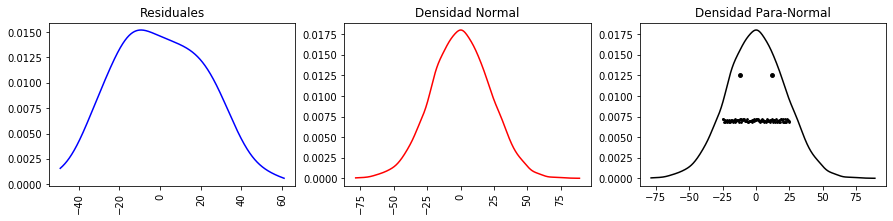

In [12]:
#Histograma residuales
fig = plt.figure(figsize=(15.,3.))
ax = fig.add_subplot(1,3,1)
ax.set_title("Residuales")
xrmin = min(e)
xrmax = max(e)
xpart = np.linspace(0.9*xrmin,1.1*xrmax,1000)
K = stats.gaussian_kde(e)
ax.plot(xpart,K(xpart),color="blue")
plt.xticks(rotation=90)
#Comparativo distribución normal
ax = fig.add_subplot(1,3,2)
xn = np.random.normal(np.mean(e),np.std(e),10000)
ax.set_title("Densidad Normal")
xrmin = min(xn)
xrmax = max(xn)
xpart = np.linspace(0.9*xrmin,1.1*xrmax,1000)
Kn = stats.gaussian_kde(xn)
ax.plot(xpart,Kn(xpart),color="red")
plt.xticks(rotation=90)
#Comparativo
ax = fig.add_subplot(1,3,3)
ax.set_title("Densidad Para-Normal")
ax.plot(xpart,Kn(xpart),color="black")
ax.scatter(-12, 0.0125, s=15,color="black")
ax.scatter(12, 0.0125, s=15,color="black")
xaux = np.linspace(-25,25,100)
yaux = []
for i in range(len(xaux)):
    yaux.extend([np.random.uniform(0.0068,0.0072)])
ax.scatter(xaux, yaux, s=3,color="black")
plt.show()

# Otras paqueterías para realizar una regresión lineal

In [13]:
#Regresión lineal con la librería statsmodels
import statsmodels.api as sm #https://www.statsmodels.org/stable/index.html
est = sm.OLS(y, sm.add_constant(x))
est2 = est.fit()
print(est2.params)
#print(est2.summary())

[9.48364326 1.96204206]


In [14]:
#Observación dimensionar un objeto array 
vec = [1,5,-7]
veca = np.asarray(vec)
vecar_1 = veca.reshape(1,3) 
vecar_2 = veca.reshape(-1,1) #El valor es inferido con base en la dimensión del vector
print(vec)
print(veca)
print(vecar_1)
print(vecar_2)

[1, 5, -7]
[ 1  5 -7]
[[ 1  5 -7]]
[[ 1]
 [ 5]
 [-7]]


In [15]:
#Regresión lineal con la librería 
from sklearn.linear_model import LinearRegression #https://scikit-learn.org/stable/
xa = np.asarray(x)
ya = np.asarray(y)
lin_reg = LinearRegression()
lin_reg.fit(xa.reshape(-1,1),ya.reshape(-1,1))
xa = np.array(x)
print(lin_reg.intercept_)
print(lin_reg.coef_)

[9.48364326]
[[1.96204206]]


# Ejercicio 1. El archivo EstaturaBebe.csv contiene la edad en meses y la estatura en centímetros de un bebé hasta un año edad. Utilizando una regresión lineal, estimar la estatura de un bebé de 13 meses.

In [16]:
#Ejericio 1. 
MB = pd.read_csv("C:\\Users\\ricardo\\Desktop\\BanxicoTrabajoCasa_v3\\CursoCienciaDeDatos\\Clases\\Programas_Modulo3\\EstaturaBebe.csv",dtype='str',encoding = "ISO-8859-1")
MB.head()

,Edad_(meses),Estatura_(centimetros)
0,1,54
1,2,57
2,3,61
3,4,63
4,5,65


In [17]:
MB["Edad_(meses)"] = MB["Edad_(meses)"].astype(float)
MB["Estatura_(centimetros)"] = MB["Estatura_(centimetros)"].astype(float)

In [18]:
xB = MB["Edad_(meses)"].values.tolist()
yB = MB["Estatura_(centimetros)"].values.tolist()
[m,b,ye,e] = RLS(xB,yB)
y13 = m*(13) + b
print("La estatura estimada de un bebe de 13 meses es",y13,"centimetros")

La estatura estimada de un bebe de 13 meses es 78.13636363636363 centimetros


# Ejercicio 2. Cargar el archivo "TransformacionRegresionLineal.csv", a partir de la gráfica de dispersión proponer una transformación de la variable X para poder ajustar una regresión lineal.

In [19]:
MB2 = pd.read_csv("C:\\Users\\ricardo\\Desktop\\BanxicoTrabajoCasa_v3\\CursoCienciaDeDatos\\Clases\\Programas_Modulo3\\TransformacionRegresionLineal.csv",dtype='str',encoding = "ISO-8859-1")
MB2.head()
#Ajuste tipo de datos
MB2["X"] = MB2["X"].astype(float)
MB2["Y"] = MB2["Y"].astype(float)     

In [20]:
#Vectores de datos
x = MB2["X"].values.tolist()
y = MB2["Y"].values.tolist()

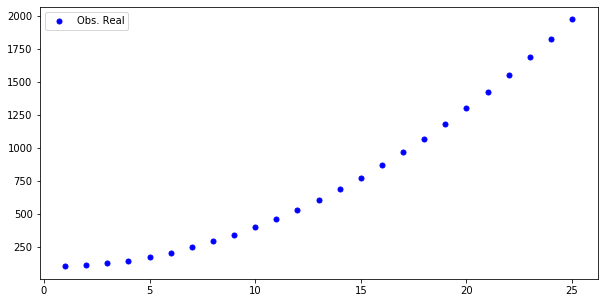

In [21]:
#Gráfica (datos orginales)
fig = plt.figure(figsize=(10.,5.))
ax = fig.add_subplot(1,1,1)
plt.scatter(x,y,color="blue",s=25,label="Obs. Real")
plt.legend(loc='best')
plt.show()

In [22]:
#Transformación datos X
MB2["X_ajustada"] = MB2["X"]**2.
MB2.head()

,X,Y,X_ajustada
0,1.0,103.0,1.0
1,2.0,112.0,4.0
2,3.0,127.0,9.0
3,4.0,148.0,16.0
4,5.0,175.0,25.0


La pendiente estimada es 78.0
La ordenda al origen estimada es -251.0


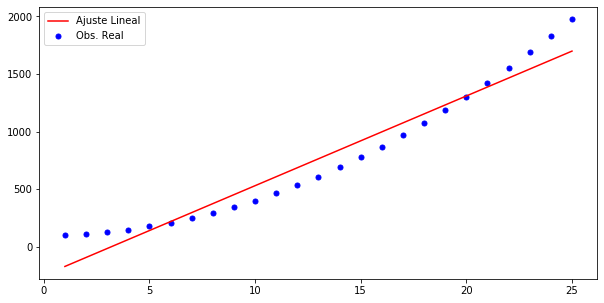

In [23]:
#Ajuste regresión (línea sin transformación de datos)
[m,b,ye,e] = RLS(x,y)
#Impresión de pendiente y ordenada al origen
print("La pendiente estimada es",m)
print("La ordenda al origen estimada es",b)
#Gráfica (Regresión Lineal)
fig = plt.figure(figsize=(10.,5.))
ax = fig.add_subplot(1,1,1)
plt.scatter(x,y,color="blue",s=25,label="Obs. Real")
plt.plot(x,ye,color="red",linewidth=1.5,label="Ajuste Lineal")
plt.legend(loc='best')
plt.show()

La pendiente estimada es 3.0
La ordenda al origen estimada es 100.0


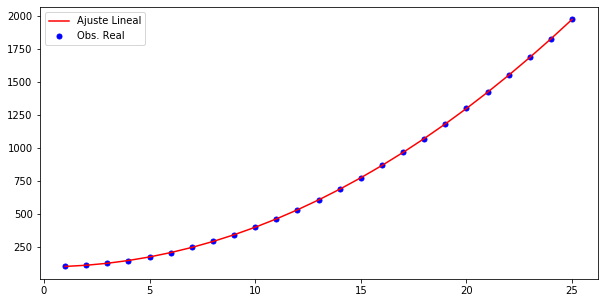

In [24]:
#Ajuste regresión (línea con transformación de datos)
xajustada = MB2["X_ajustada"].values.tolist()
[m,b,ye,e] = RLS(xajustada,y)
#Impresión de pendiente y ordenada al origen
print("La pendiente estimada es",m)
print("La ordenda al origen estimada es",b)
#Gráfica (Regresión Lineal)
fig = plt.figure(figsize=(10.,5.))
ax = fig.add_subplot(1,1,1)
plt.scatter(x,y,color="blue",s=25,label="Obs. Real")
plt.plot(x,ye,color="red",linewidth=1.5,label="Ajuste Lineal")
plt.legend(loc='best')
plt.show()

# Regresión lineal múltiple

In [25]:
MRLM = pd.read_csv("C:\\Users\\ricardo\\Desktop\\BanxicoTrabajoCasa_v3\\CursoCienciaDeDatos\\Clases\\Programas_Modulo3\\RegresionLinealMultiple-212.csv",dtype='str',encoding = "ISO-8859-1")
MRLM["Variable_Y"] = MRLM["Variable_Y"].astype(float)
MRLM["Variable_X1"] = MRLM["Variable_X1"].astype(float)
MRLM["Variable_X2"] = MRLM["Variable_X2"].astype(float)
MRLM["Variable_X3"] = MRLM["Variable_X3"].astype(float)
MRLM.head()

,Variable_Y,Variable_X1,Variable_X2,Variable_X3
0,1.214969,0.648652,0.055091,0.630192
1,3.125477,0.512865,0.544197,0.661214
2,1.265861,0.629910,0.675931,0.203599
3,1.159661,0.451265,0.790437,0.196995
4,1.192390,0.628143,0.910681,0.163468


In [26]:
#Importación de librería
from sklearn.linear_model import LinearRegression
X = np.asarray(MRLM[["Variable_X1","Variable_X2","Variable_X3"]])
y = np.asarray(MRLM[["Variable_Y"]])
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

[1.32922839]
[[-2.23604946  1.07287217  1.50265882]]


In [27]:
MRLM["Y_Aproximada"] = lin_reg.intercept_[0] + lin_reg.coef_[0][0]*MRLM["Variable_X1"] + \
lin_reg.coef_[0][1]*MRLM["Variable_X2"] + lin_reg.coef_[0][2]*MRLM["Variable_X3"]
MRLM.head()

,Variable_Y,Variable_X1,Variable_X2,Variable_X3,Y_Aproximada
0,1.214969,0.648652,0.055091,0.630192,0.884880
1,3.125477,0.512865,0.544197,0.661214,1.759869
2,1.265861,0.629910,0.675931,0.203599,0.951847
3,1.159661,0.451265,0.790437,0.196995,1.464231
4,1.192390,0.628143,0.910681,0.163468,1.147351


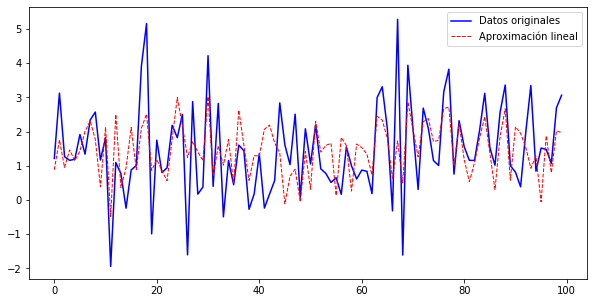

In [28]:
#Gráfica entre los valores reales y los valores aproximados
fig = plt.figure(figsize=(10.,5.))
ax = fig.add_subplot(1,1,1)
plt.plot(range(len(MRLM["Variable_Y"].values)),MRLM["Variable_Y"].values,color="blue",linewidth=1.5,label="Datos originales")
plt.plot(range(len(MRLM["Y_Aproximada"].values)),MRLM["Y_Aproximada"].values,color="red",linewidth=1,ls="--",label="Aproximación lineal")
plt.legend(loc='best')
plt.show()

# Ejercicio 3. Agregar dos columnas a la base MRLM: 1) Columna que calcule las diferencias al cuadrado entre el valor real y el valor aproximado de la variable Y, 2) columna que calcule las diferencias del inciso anterior en valor absoluto. Imprimir el promedio de cada columna por separado.

In [29]:
MRLM["Dif_Cuadrado"] = (MRLM["Variable_Y"] - MRLM["Y_Aproximada"])**2.
MRLM["Dif_ValorAbsoluto"] = abs(MRLM["Variable_Y"] - MRLM["Y_Aproximada"])
MRLM.head()

,Variable_Y,Variable_X1,Variable_X2,Variable_X3,Y_Aproximada,Dif_Cuadrado,Dif_ValorAbsoluto
0,1.214969,0.648652,0.055091,0.630192,0.884880,0.108958,0.330088
1,3.125477,0.512865,0.544197,0.661214,1.759869,1.864885,1.365608
2,1.265861,0.629910,0.675931,0.203599,0.951847,0.098605,0.314014
3,1.159661,0.451265,0.790437,0.196995,1.464231,0.092763,0.304570
4,1.192390,0.628143,0.910681,0.163468,1.147351,0.002029,0.045039


In [30]:
print("El promedio de las diferencias al cuadrado (norma L2) es igual a: ", MRLM["Dif_Cuadrado"].mean())
print("El promedio de las diferencias en valor absoluto (norma L1) es igual a: ", MRLM["Dif_ValorAbsoluto"].mean())

El promedio de las diferencias al cuadrado (norma L2) es igual a:  1.165153433819762
El promedio de las diferencias en valor absoluto (norma L1) es igual a:  0.8418521915071693
